## Part 1

### Q1.1 
### Histogrammer



In [1]:
import os
import time
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath

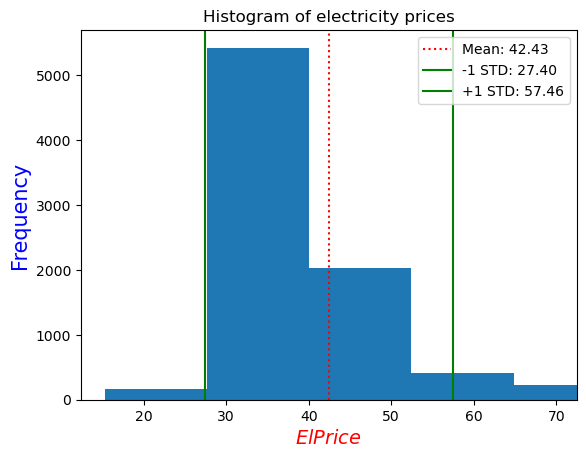

In [51]:
data_Marijampole = pd.read_csv(
    r'C:\Users\khhag\HydesignPersonal\hydesign\examples\Europe\GWA2\input_ts_Marijampole_LT.csv',
    index_col=0)

el_prices=data_Marijampole['Price']

el_price_std=el_prices.std()
el_price_mean=el_prices.mean()

plt.hist(el_prices, bins=10)
plt.title('Histogram of electricity prices')
plt.xlim(el_price_mean - 2*el_price_std, el_price_mean + 2*el_price_std)
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('$El Price$', fontsize=14, color='red')
plt.axvline(el_price_mean, ls=':',  color='red', label=f'Mean: {el_price_mean:.2f}')
plt.axvline(el_price_mean-el_price_std, color='green',label=f'-1 STD: {(el_price_mean - el_price_std):.2f}')
plt.axvline(el_price_mean+el_price_std, color='green', label=f'+1 STD: {(el_price_mean + el_price_std):.2f}')
plt.legend()
plt.show()

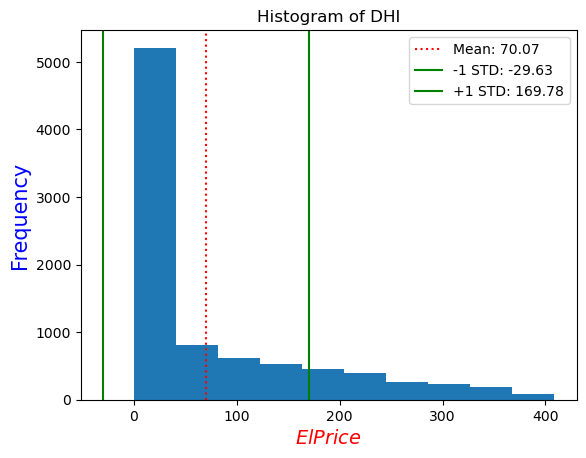

In [54]:
dhi=data_Marijampole['dhi']

dhi_std=dhi.std()
dhi_mean=dhi.mean()

plt.hist(dhi, bins=10)
plt.title('Histogram of DHI')
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('$El Price$', fontsize=14, color='red')
plt.axvline(dhi_mean, ls=':',  color='red', label=f'Mean: {dhi_mean:.2f}')
plt.axvline(dhi_mean-dhi_std, color='green',label=f'-1 STD: {(dhi_mean - dhi_std):.2f}')
plt.axvline(dhi_mean+dhi_std, color='green', label=f'+1 STD: {(dhi_mean + dhi_std):.2f}')
plt.legend()
plt.show()

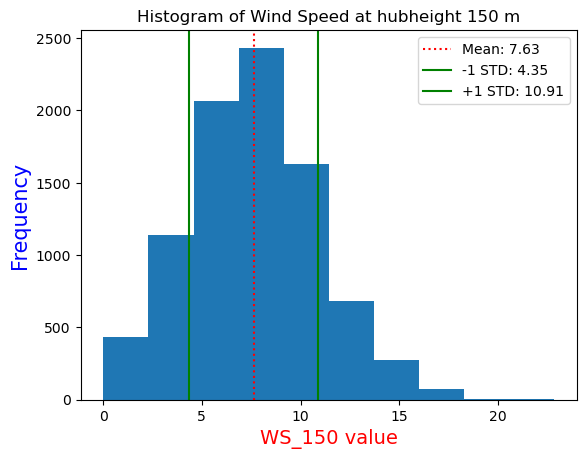

In [58]:
ws_150 = data_Marijampole['WS_150']

ws_150_mean = ws_150.mean()
ws_150_std = ws_150.std()

plt.hist(ws_150, bins=10)
plt.title('Histogram of Wind Speed at hubheight 150 m')
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('WS_150 value', fontsize=14, color='red')

plt.axvline(ws_150_mean, ls=':', color='red', label=f'Mean: {ws_150_mean:.2f}')
plt.axvline(ws_150_mean - ws_150_std, color='green', label=f'-1 STD: {(ws_150_mean - ws_150_std):.2f}')
plt.axvline(ws_150_mean + ws_150_std, color='green', label=f'+1 STD: {(ws_150_mean + ws_150_std):.2f}')

plt.legend()
plt.show()

### Correlations

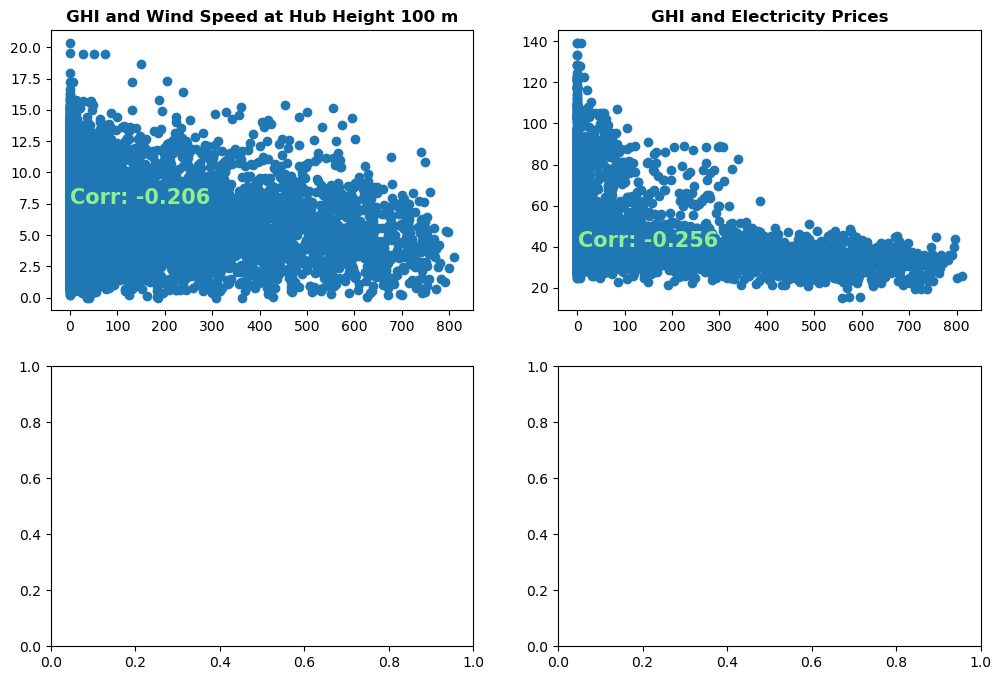

In [84]:

ghi=data_Marijampole['ghi']
ws_100=data_Marijampole['WS_100']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

corr_ghi_WS100=np.round(np.corrcoef(ghi, ws_100)[0,1],3)
axes[0,0].scatter(ghi,ws_100)
axes[0,0].text(1,7.5,f'Corr: {corr_ghi_WS100}',fontsize=15,color='lightgreen',fontweight='bold')
axes[0,0].set_title('GHI and Wind Speed at Hub Height 100 m',fontweight='bold')

corr_ghi_el_prices=np.round(np.corrcoef(ghi, el_prices)[0,1],3)
axes[0,1].scatter(ghi,el_prices)
axes[0,1].text(1,40,f'Corr: {corr_ghi_el_prices}',fontsize=15,color='lightgreen',fontweight='bold')
axes[0,1].set_title('GHI and Electricity Prices',fontweight='bold')

plt.show()